## Import das bibliotecas utilizadas


In [22]:
import pandas as pd
import numpy as np
import itertools
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error



### Carregamento dos dados para a parte de Modelagem

In [23]:
df_transposed_copy_inputting_v19 = pd.read_csv(r'Projeto/Data/Output/df_transposed_copy_inputting_v19.csv')


## Modelagem

Modelos de Forecasting são divididos em partes pré e pós período desejado para previsão. Os períodos utilizados devem ser equiparáveis ao tipo de questão analisada.

In [24]:
df_model = df_transposed_copy_inputting_v19.copy()

In [25]:
df_model['year'] = pd.to_datetime(df_model['year'], format='ISO8601')


In [26]:
#df_model.set_index('year', inplace = True)
#df_model.info()

In [27]:
df_model.head(5)

,year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
0,1980-01-01,4.345486,2.7,-5.4,2.877381,2.4,8.2,0.7,5.290000,5.399885,...,-0.8,3.3,3.988678,1.8,6.4,0.9,-1.9,3.8,3.991920,2.1
1,1981-01-01,7.200000,5.7,3.0,0.385714,-4.4,3.8,-5.7,3.798462,-3.624698,...,-0.5,1.9,1.792949,0.1,0.9,2.0,-0.2,4.2,4.567689,1.9
2,1982-01-01,5.116667,2.9,6.4,0.371429,0.0,-0.1,-3.1,2.306923,4.538833,...,1.4,1.5,5.395555,0.6,-0.5,-0.1,0.4,2.2,8.037341,0.7
3,1983-01-01,4.283333,1.1,5.4,1.471429,4.2,5.4,3.7,0.815385,1.930603,...,4.6,1.8,4.752000,1.7,-2.8,3.3,0.7,4.0,3.300508,2.6
4,1984-01-01,6.166667,2.0,5.6,2.585714,6.0,10.2,2.0,-0.676154,-15.680825,...,4.1,4.1,-0.599934,2.5,3.9,5.0,0.3,6.6,5.023940,4.6


In [28]:
df_model.year

0    1980-01-01
1    1981-01-01
2    1982-01-01
3    1983-01-01
4    1984-01-01
5    1985-01-01
6    1986-01-01
7    1987-01-01
8    1988-01-01
9    1989-01-01
10   1990-01-01
11   1991-01-01
12   1992-01-01
13   1993-01-01
14   1994-01-01
15   1995-01-01
16   1996-01-01
17   1997-01-01
18   1998-01-01
19   1999-01-01
20   2000-01-01
21   2001-01-01
22   2002-01-01
23   2003-01-01
24   2004-01-01
25   2005-01-01
26   2006-01-01
27   2007-01-01
28   2008-01-01
29   2009-01-01
30   2010-01-01
31   2011-01-01
32   2012-01-01
33   2013-01-01
34   2014-01-01
35   2015-01-01
36   2016-01-01
37   2017-01-01
38   2018-01-01
39   2019-01-01
40   2020-01-01
41   2021-01-01
42   2022-01-01
43   2023-01-01
44   2024-01-01
45   2025-01-01
46   2026-01-01
47   2027-01-01
48   2028-01-01
Name: year, dtype: datetime64[ns]

In [29]:
df_model = df_model.rename(columns = {'year': 'ds'})
df_model.head(1)

,ds,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
0,1980-01-01,4.345486,2.7,-5.4,2.877381,2.4,8.2,0.7,5.29,5.399885,...,-0.8,3.3,3.988678,1.8,6.4,0.9,-1.9,3.8,3.99192,2.1


### "Holidays"

In [30]:
df_model_with_holidays = df_model.copy()

In [31]:
df_model_with_holidays['holiday'] = 0

# Define the value 1 for the years of 2008 and 2020
df_model_with_holidays.loc[df_model_with_holidays['ds'].dt.year.isin([2008, 2020]), 'holiday'] = 1

print(df_model_with_holidays)

           ds  Afghanistan  Albania  Algeria    Andorra  Angola  \
0  1980-01-01     4.345486      2.7     -5.4   2.877381     2.4   
1  1981-01-01     7.200000      5.7      3.0   0.385714    -4.4   
2  1982-01-01     5.116667      2.9      6.4   0.371429     0.0   
3  1983-01-01     4.283333      1.1      5.4   1.471429     4.2   
4  1984-01-01     6.166667      2.0      5.6   2.585714     6.0   
5  1985-01-01     5.433333     -1.5      5.6   2.828571     3.5   
6  1986-01-01     5.383333      5.6     -0.2   3.385714     2.9   
7  1987-01-01     6.150000     -0.8     -0.7   2.214286     4.1   
8  1988-01-01     7.283333     -1.4     -1.9   4.342857     6.1   
9  1989-01-01     4.350000      9.8      4.8   4.928571     0.0   
10 1990-01-01     5.983333    -10.0      0.8   4.171429    -3.5   
11 1991-01-01     5.266667    -28.0     -1.2   3.071429    12.1   
12 1992-01-01     3.533333     -7.2      1.6   1.471429    11.4   
13 1993-01-01     4.333333      9.6     -2.1   0.457143    11.

In [32]:
holiday_dates = df_model_with_holidays[df_model_with_holidays.holiday == 1].ds
holidays = pd.DataFrame({'holiday':'major events',
                        'ds' : pd.to_datetime(holiday_dates),
                        'lower_window': -3,
                        'upper_window': 1
                        })
holidays.head()

,holiday,ds,lower_window,upper_window
28,major events,2008-01-01,-3,1
40,major events,2020-01-01,-3,1


#### Training and Test set

In [33]:
test_years = 5
train_data = df_model.iloc[:-test_years, :]
train_data.tail(1)

,ds,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
43,2023-01-01,3.0,2.2,2.6,1.3,3.5,5.5,0.2,5.5,1.6,...,1.2,3.9,0.8,0.7,1.6,1.1,2.9,1.8,3.6,2.8


In [34]:
test_data = df_model.iloc[-test_years:, :]
test_data.head(1)


,ds,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
44,2024-01-01,4.383333,3.3,2.6,1.5,3.7,5.4,2.0,5.0,1.2,...,2.5,4.2,1.4,1.6,2.2,1.1,3.5,2.2,4.2,3.0


### FB Prophet com regressor


In [35]:
country = 'United States'

In [44]:
df_prophet = df_model[[country, 'ds', 'World']].copy()
#df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
print(df_prophet)
df_prophet.rename(columns={country: 'y'}, inplace = True)

train_data_prophet = train_data[[country, 'ds', 'World']]
train_data_prophet.rename(columns={country: 'y'}, inplace = True)

    United States         ds  World
0            -0.3 1980-01-01    2.1
1             2.5 1981-01-01    1.9
2            -1.8 1982-01-01    0.7
3             4.6 1983-01-01    2.6
4             7.2 1984-01-01    4.6
5             4.2 1985-01-01    3.6
6             3.5 1986-01-01    3.6
7             3.5 1987-01-01    3.9
8             4.2 1988-01-01    4.7
9             3.7 1989-01-01    3.8
10            1.9 1990-01-01    3.4
11           -0.1 1991-01-01    2.7
12            3.5 1992-01-01    2.3
13            2.8 1993-01-01    2.0
14            4.0 1994-01-01    3.2
15            2.7 1995-01-01    3.3
16            3.8 1996-01-01    3.9
17            4.4 1997-01-01    4.0
18            4.5 1998-01-01    2.6
19            4.8 1999-01-01    3.5
20            4.1 2000-01-01    4.8
21            1.0 2001-01-01    2.5
22            1.7 2002-01-01    2.9
23            2.8 2003-01-01    4.3
24            3.9 2004-01-01    5.4
25            3.5 2005-01-01    4.9
26            2.8 2006-01-01

/tmp/ipykernel_1439773/1657486716.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_prophet.rename(columns={country: 'y'}, inplace = True)


In [45]:
train_data_prophet

,y,ds,World
0,-0.3,1980-01-01,2.1
1,2.5,1981-01-01,1.9
2,-1.8,1982-01-01,0.7
3,4.6,1983-01-01,2.6
4,7.2,1984-01-01,4.6
5,4.2,1985-01-01,3.6
6,3.5,1986-01-01,3.6
7,3.5,1987-01-01,3.9
8,4.2,1988-01-01,4.7
9,3.7,1989-01-01,3.8


In [56]:
#FB prophet model

m = Prophet(
    growth='linear',
    seasonality_mode='additive',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    changepoint_prior_scale=0.1,
    seasonality_prior_scale=4,
)
m.add_regressor('World')
m.fit(train_data_prophet)

19:14:45 - cmdstanpy - INFO - Chain [1] start processing


19:14:45 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
# Forecasting - Create future DF

# Crie um novo DataFrame 'future' que se estende até 2028
#future = pd.DataFrame({'ds': pd.date_range(start=test_data['ds'].min(), end='2028-12-31', freq='Y')})
future = m.make_future_dataframe(periods=test_years, freq='YS')  

future.tail()


,ds
44,2024-01-01
45,2025-01-01
46,2026-01-01
47,2027-01-01
48,2028-01-01


In [58]:
#test_data_copy = test_data.copy()
#test_data_copy.reset_index(drop=True, inplace=True)
future = pd.concat([future, df_prophet['World']], axis=1)


In [60]:
#forecast

forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,World,World_lower,World_upper,additive_terms,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-01-01,1.757729,0.526314,3.780047,1.757729,1.757729,-1.150641,-1.150641,-1.150641,0.468803,...,-1.150641,-1.150641,-1.150641,1.619444,1.619444,1.619444,0.0,0.0,0.0,2.226532
1,1981-01-01,1.717715,0.261046,3.707311,1.717715,1.717715,-1.333085,-1.333085,-1.333085,0.347705,...,-1.333085,-1.333085,-1.333085,1.680790,1.680790,1.680790,0.0,0.0,0.0,2.065420
2,1982-01-01,1.677810,-0.804759,2.646248,1.677810,1.677810,-2.427749,-2.427749,-2.427749,-0.771078,...,-2.427749,-2.427749,-2.427749,1.656671,1.656671,1.656671,0.0,0.0,0.0,0.906732
3,1983-01-01,1.637905,0.906271,4.208913,1.637905,1.637905,-0.694531,-0.694531,-0.694531,0.941683,...,-0.694531,-0.694531,-0.694531,1.636214,1.636214,1.636214,0.0,0.0,0.0,2.579588
4,1984-01-01,1.598000,2.701292,5.979590,1.598000,1.598000,1.129909,1.129909,1.129909,2.749353,...,1.129909,1.129909,1.129909,1.619444,1.619444,1.619444,0.0,0.0,0.0,4.347353


In [61]:
predictions_prophet = forecast.yhat[-test_years:].rename("prophet")
predictions_prophet[:5]

44    1.290847
45    1.494643
46    1.430641
47    1.279078
48    1.131202
Name: prophet, dtype: float64

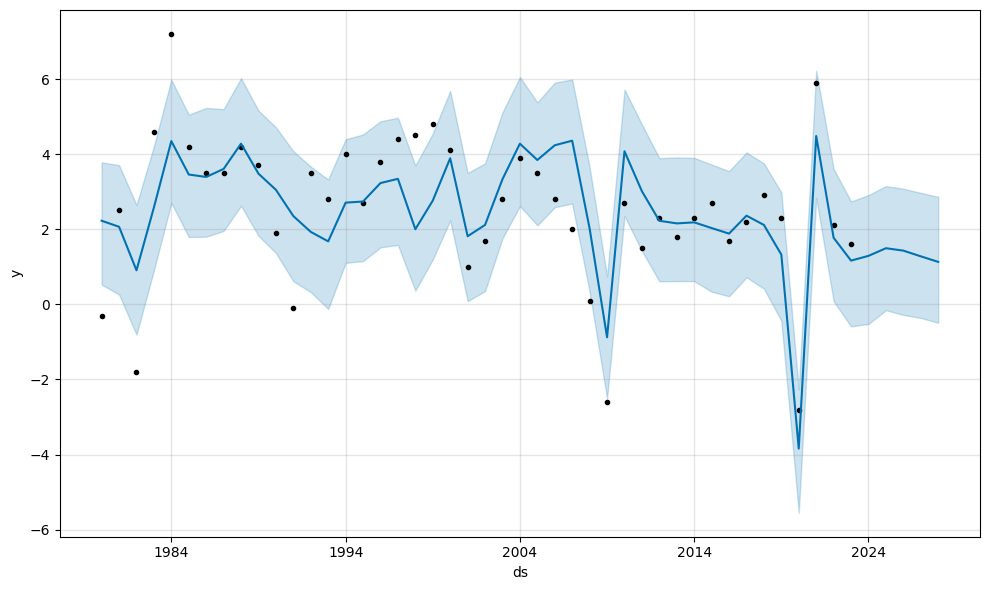

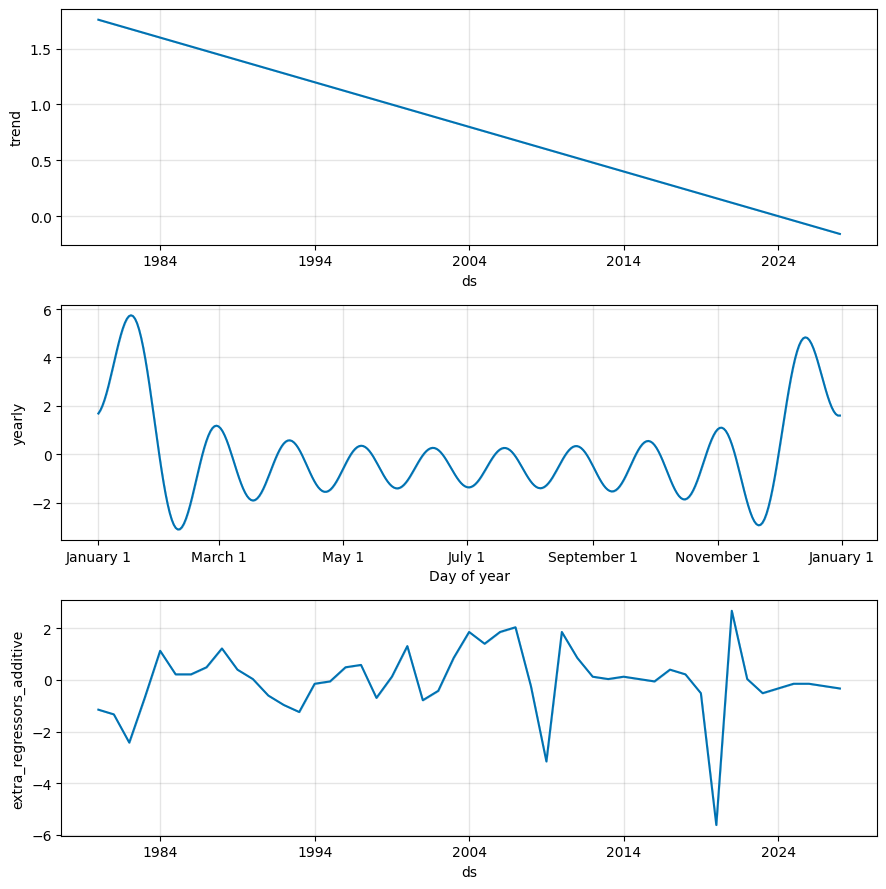

In [62]:
#visualization forecast
m.plot(forecast);
m.plot_components(forecast);

#### KPIS de Avaliação do Modelo
 Indicadores para medir a performance do modelo. MAE e RSME são indicadores de performance para modelos de regressão com variáveis dependentes contínuas. Não existem indicadores considerados 'perfeitos', existem os indicadores melhores apropriados para o problema analisado.

 - MAE - (Mean Absolute Error) É um indicador mais interpretável, utilizado quando a série temporal trata de taxas, porcentagens.
- RSME -  (Root Square Mean Error) São utilizados para modelos com outliers/extremos.
- MAPE - (Mean Absolute Percentage Error) Apesar de tratar os erros de forma absoluta é considerado um indicador mais agradável para comunicar a respeito do modelo. 

In [67]:

def MAPE(df_model_true, df_model_pred):
    df_model_true, df_model_pred = np.array(df_model_true), np.array(df_model_pred)
    return np.mean(np.abs((df_model_true - df_model_pred)/ df_model_true)) *100


#loop for metrics mae, rmse and mape
#for country in df_model.columns:
    mae = (round(mean_absolute_error(test_data[country], predictions_prophet),2))
    rmse = (round(np.sqrt(mean_squared_error(test_data[country], predictions_prophet)),2))
    mape = (MAPE(test_data[country], predictions_prophet))
    print(f"Country: {country}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape}")
    print("=============")

Country: United States
MAE: 0.59
RMSE: 0.66
MAPE: 30.28259936660531


### Export forecasts 

In [68]:
## Export forecast

predictions_prophet.to_csv('Projeto/Data/Output/predictions_prophet.csv', index = True)